In [5]:
pip install python-louvain


Équivalences structurelles (communautés):
Communauté Woman0: 0
Communauté Woman1: 0
Communauté Woman2: 0
Communauté Woman3: 0
Communauté Woman4: 1
Communauté Woman5: 2
Communauté Woman6: 0
Communauté Woman7: 1
Communauté Woman8: 2
Communauté Woman9: 2
Communauté Woman10: 1
Communauté Woman11: 1
Communauté Woman12: 1
Communauté Woman13: 0
Communauté Woman14: 1
Communauté Woman15: 1
Communauté Woman16: 1
Communauté Woman17: 1
Communauté Event0: 2
Communauté Event1: 1
Communauté Event2: 2
Communauté Event3: 0
Communauté Event4: 0
Communauté Event5: 0
Communauté Event6: 0
Communauté Event7: 0
Communauté Event8: 0
Communauté Event9: 1
Communauté Event10: 1
Communauté Event11: 1
Communauté Event12: 1
Communauté Event13: 1


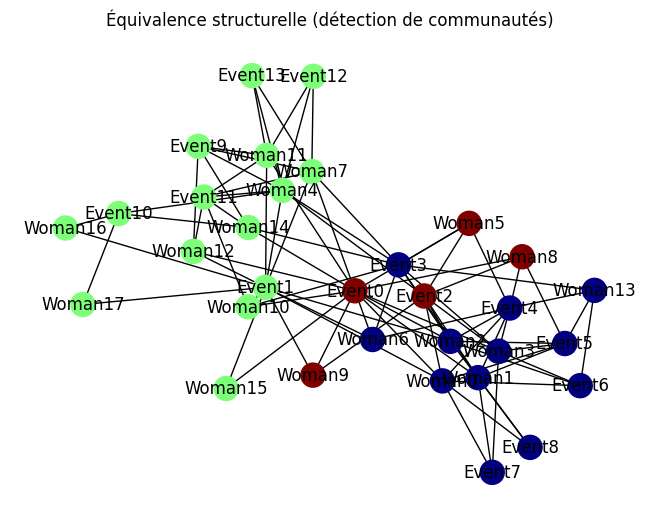

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain  # Assurez-vous que la bibliothèque est installée

# Jeu de données sur les femmes du Sud (nœuds: femmes et événements)
adj_matrix = np.array([
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
])

# Création du graphe bipartite
B = nx.Graph()

# Ajout des nœuds pour les femmes et les événements
women = ["Woman" + str(i) for i in range(18)]
events = ["Event" + str(i) for i in range(14)]

B.add_nodes_from(women, bipartite=0)
B.add_nodes_from(events, bipartite=1)

# Ajout des arêtes selon la matrice d'adjacence
edges = [(women[i], events[j]) for i in range(len(women)) for j in range(len(events)) if adj_matrix[i, j] == 1]
B.add_edges_from(edges)

# Calcul des équivalences structurelles en utilisant l'algorithme de Louvain pour identifier les communautés
partition = community_louvain.best_partition(B)

# Affichage des communautés
print("Équivalences structurelles (communautés):")
for community, nodes in partition.items():
    print(f"Communauté {community}: {nodes}")

# Visualisation des communautés
pos = nx.spring_layout(B)
colors = [partition[node] for node in B.nodes()]
nx.draw(B, pos, node_color=colors, with_labels=True, cmap=plt.cm.jet)
plt.title("Équivalence structurelle (détection de communautés)")
plt.show()
